# Imports

In [19]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import sys
import copy
import pickle
from sklearn.metrics import normalized_mutual_info_score
from scipy.sparse.csgraph import connected_components
from data_plotting import scatter_plot_matrix, plot_3D_data
import time


sys.path.append('/home/nico/VSCodeRepos/SigMA/')
from SigMA.SigMA import SigMA
from velocity_testing.velocity_test import VelocityTester
from NoiseRemoval.RemoveNoiseTransformed import remove_noise_simple
from generate_data import DataGenerator

# Test Cases Overview & Summary

In [3]:
# contains true split
test_case_1 = [
    {
        'clusters': [0, 1],
        'mu_position': [
            [-500, -500, 20],
            [-490, -490, 35]
        ],
        'mu_std': [
            np.array([3, 5, 2]),
            np.array([4, 8, 2])
        ]
    }
]

# contains true split
test_case_2 = [
    {
        'clusters': [0, 2],
        'mu_position': [
            [20, 40, 150],
            [20, 40, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([6, 5, 5])
        ]
    }
]

# contains true split
test_case_3 = [
    {
        'clusters': [0, 3],
        'mu_position': [
            [-20, 40, 160],
            [-20, 40, 140]
        ],
        'mu_std': [
            np.array([5, 7, 3]),
            np.array([4, 5, 3])
        ]
    }
]

# contains true split
test_case_4 = [
    {
        'clusters': [0, 4],
        'mu_position': [
            [-20, 300, 160],
            [-20, 300, 150]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains true split
test_case_5 = [
    {
        'clusters': [0, 5],
        'mu_position': [
            [-20, 300, 170],
            [-20, 300, 170]
        ],
        'mu_std': [
            np.array([4, 3, 4]),
            np.array([6, 5, 4])
        ]
    }
]

# contains a few noise splits
test_case_6 = [
    {
        'clusters': [1, 2],
        'mu_position': [
            [-30, -150, 180],
            [-30, -150, 160]
        ],
        'mu_std': [
            np.array([4, 2, 4]),
            np.array([6, 6, 4])
        ]
    }
]

# contains a true split
test_case_7 = [
    {
        'clusters': [1, 3],
        'mu_position': [
            [-30, 150, 180],
            [-30, 150, 160]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 4, 7])
        ]
    }
]

# contains a true split
test_case_8 = [
    {
        'clusters': [1, 4],
        'mu_position': [
            [200, -150, 0],
            [200, -170, 0]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_9 = [
    {
        'clusters': [1, 5],
        'mu_position': [
            [100, 200, -150],
            [100, 200, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([7, 7, 7])
        ]
    }
]

# contains a true split
test_case_10 = [
    {
        'clusters': [2, 3],
        'mu_position': [
            [-100, 200, -150],
            [-100, 200, -150]
        ],
        'mu_std': [
            np.array([4, 4, 3]),
            np.array([7, 5, 7])
        ]
    }
]

# contains a true split and 2 noise splits
test_case_11 = [
    {
        'clusters': [2, 4],
        'mu_position': [
            [-100, 300, -150],
            [-100, 300, -150]
        ],
        'mu_std': [
            np.array([7, 7, 7]),
            np.array([7, 7, 7])
        ]
    }
]

# contains 5 noise spilts
test_case_12 = [
    {
        'clusters': [2, 5],
        'mu_position': [
            [-100, 400, -150],
            [-100, 400, -150]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]
    }
]

# contains a few noise splits
test_case_13 = [
    {
        'clusters': [3, 4],
        'mu_position': [
            [270, 200, 300],
            [270, 200, 300]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 5])
        ]
    }
]

# contains a few noise splits
test_case_14 = [
    {
        'clusters': [3, 5],
        'mu_position': [
            [260, -100, 200],
            [260, -100, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_15 = [
    {
        'clusters': [0, 0],
        'mu_position': [
            [260, -90, 200],
            [260, -115, 200]
        ],
        'mu_std': [
            np.array([4, 3, 7]),
            np.array([4, 5, 6])
        ]
    }
]

# can contain a wrong split
test_case_16 = [
    {
        'clusters': [1, 1],
        'mu_position': [
            [120, 20, 200],
            [120, -10, 200]
        ],
        'mu_std': [
            np.array([5, 7, 7]),
            np.array([4, 7, 7])
        ]   
    }
]

# can contain a wrong split
test_case_17 = [
    {
        'clusters': [2, 2],
        'mu_position': [
            [400, 400, 400],
            [360, 400, 400]
        ],
        'mu_std': [
            np.array([7, 7, 4]),
            np.array([7, 7, 4])
        ]   
    }
]

# can contain a wrong split
test_case_18 = [
    {
        'clusters': [3, 3],
        'mu_position': [
            [400, 250, 400],
            [400, 265, 400]
        ],
        'mu_std': [
            np.array([3, 3, 3]),
            np.array([3, 3, 3])
        ]   
    }
]

# can contain a wrong split
test_case_19 = [
    {
        'clusters': [4, 4],
        'mu_position': [
            [-100, 250, 400],
            [-127, 250, 400]
        ],
        'mu_std': [
            np.array([4, 6, 7]),
            np.array([4, 2, 5])
        ]   
    }
]

# can contain a wrong split
test_case_20 = [
    {
        'clusters': [5, 5],
        'mu_position': [
            [200, -350, 150],
            [230, -350, 150]
        ],
        'mu_std': [
            np.array([7, 5, 4]),
            np.array([3, 3, 5])
        ]   
    }
]

# total about:
# - 10 true splits
# - 10 noise splits
# - 5 wrong splits

# combine the test cases
test_cases = test_case_1 + test_case_2 + test_case_3 + test_case_4 + test_case_5 + test_case_6 + test_case_7 + test_case_8 + test_case_9 + test_case_10 + test_case_11 + test_case_12 + test_case_13 + test_case_14 + test_case_15 + test_case_16 + test_case_17 + test_case_18 + test_case_19 + test_case_20

In [4]:
# save test case summary to file
# with open('simulated_data/test_cases.pkl', 'wb') as f:
#     pickle.dump(test_cases, f)

# Data Creation

In [5]:
data_generator = DataGenerator()
data_no_noise, _ = data_generator.generate_data(test_cases)
data, labels_true, err_sampler = data_generator.add_noise(n_samples=50000)

Dec out of bounds: Performing correction


In [6]:
cols = ['X', 'Y', 'Z']
# cols = ['ra', 'dec', 'parallax']
# cols = ['U', 'V', 'W']
# cols = ['pmra', 'pmdec', 'radial_velocity']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=labels_true, true_labels=None)

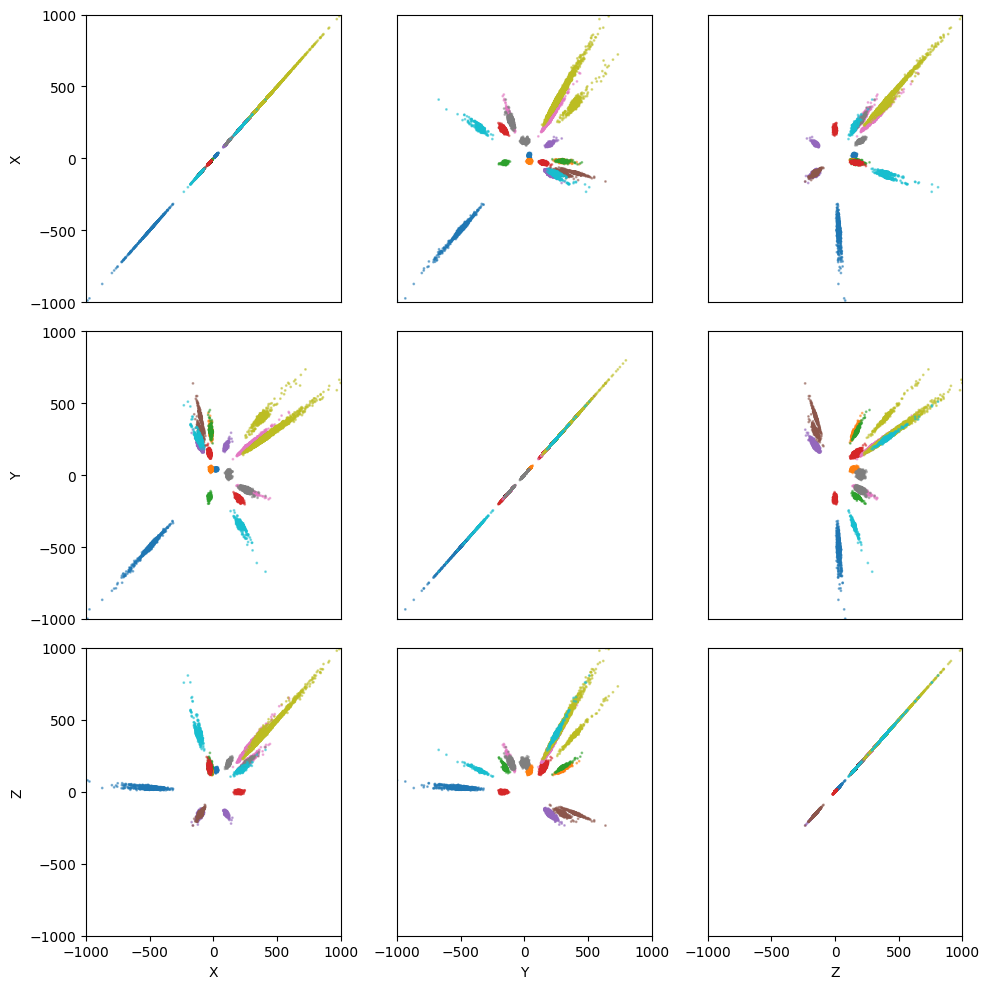

In [7]:
# only plot the true clusters
data_no_noise = copy.deepcopy(data[labels_true != -1])
labels_true_no_noise = copy.deepcopy(labels_true[labels_true != -1])

scatter_plot_matrix(data_no_noise, labels_true_no_noise, cols)

# SigMA Helper Functions

In [8]:
def extract_cluster_single(label_bool_arr, clusterer):
    # Written by Sebastian Ratzenböck
    cluster_bool_array = remove_noise_simple(label_bool_arr, te_obj=clusterer)
    if cluster_bool_array is not None:
        return cluster_bool_array
    else:
        data_idx = np.arange(clusterer.X.shape[0])
        rho = clusterer.weights_[label_bool_arr]
        mad = np.median(np.abs(rho - np.median(rho)))
        threshold = np.median(rho)*0.995 + 3 * mad * 1.05
        # Statistisch fundierterer cut
        # threshold = np.median(rho) + 3 * mad
        idx_cluster = data_idx[label_bool_arr][rho > threshold]
        if len(idx_cluster) > 20:
            # labels_with_noise[idx_cluster] = i
            # Only graph connected points allowed
            _, cc_idx = connected_components(clusterer.A[idx_cluster, :][:, idx_cluster])
            # Combine CCs data points with originally defined dense core (to not miss out on potentially dropped points)
            idx_cluster = data_idx[idx_cluster][cc_idx == np.argmax(np.bincount(cc_idx))]
        
        cluster_bool_array = np.isin(data_idx, idx_cluster)
        return cluster_bool_array
    
def extract_signal(clusterer, labels):
    # Written by Sebastian Ratzenböck
    labels_with_noise = -np.ones(clusterer.X.shape[0], dtype=int)
    for i, u_cl in enumerate(np.unique(labels[labels>-1])):
        cluster_bool_array = extract_cluster_single(labels==u_cl, clusterer)
        labels_with_noise[cluster_bool_array] = i
        
    return labels_with_noise

# Run & Plot SigMA

In [9]:
# cols2fit = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
cols2fit = ['X', 'Y', 'Z', 'U', 'V']
df_fit = copy.deepcopy(data[cols2fit])

In [278]:
# Scale features
sf = {
    'ra': 1/0.64,
    'dec': 1/0.65,
    'parallax': 1/0.15,
    'pmra': 1/0.49,
    'pmdec': 1/0.57
}
for col in cols2fit:
    df_fit[col] *= sf[col]

KeyError: 'X'

In [10]:
sigma_kwargs = dict(
    cluster_features=cols2fit,
    scale_factors=None,
    # These are the default values and should be kept for now
    nb_resampling=0, max_knn_density=101,
    beta=0.99, knn_initcluster_graph=40,
    transform_function=None
)
clusterer = SigMA(data=df_fit, **sigma_kwargs).fit(alpha=0.01, knn=15, bh_correction=True)

Performing gradient ascend using a 15-NN density estimation.
Updated significance threshold: 8.91e-04


In [343]:
cols = ['X', 'Y', 'Z']
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=labels_true)
# plot_3D_data(data, xyz_titles=cols, ax_range=[-1000, 1000], labels=clusterer.labels_, true_labels=None)

# Compute NMI

In [11]:
nmi_data = {}
labels_pred = extract_signal(clusterer, clusterer.labels_)
nmi_data['sigma'] = normalized_mutual_info_score(labels_true, labels_pred)
nmi_data

{'sigma': 0.3897299951255838}

In [12]:
np.unique(labels_true, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39]),
 array([50000,   305,   438,   305,   200,   305,  3965,   305,   274,
          305,   200,   438,   200,   438,  3965,   438,   274,   438,
          200,   200,  3965,   200,   274,   200,   200,  3965,   274,
         3965,   200,   305,   305,   438,   438,   200,   200,  3965,
         3965,   274,   274,   200,   200]))

In [13]:
np.unique(clusterer.labels_, return_counts=True)

(array([  183,   189,   249,   426,   466,   485,   506,   955,  3729,
         3772,  4164,  4578,  4889,  4911,  5565,  5574,  5575,  5688,
         5712,  5761,  5795,  5811,  6246,  6617,  6659,  6719,  6923,
         6937,  7145,  7884,  8413,  8416,  8733,  8913,  9439,  9565,
         9944, 10768, 10769, 10836, 10844, 10943, 11194, 11257, 11337,
        11644, 11949, 11959, 12018, 12061, 12079, 12437, 12490, 12539,
        12559, 12646, 12689, 12713, 12732, 13746, 13971, 14236, 14488,
        14588, 14814, 15717, 16667, 16838, 17532, 17818, 17923, 18040,
        18713, 19112, 19259, 19306, 19707, 19910, 20172, 20382, 20960,
        21481, 22118, 22673, 22761, 23110, 23283, 24005, 24323, 24678,
        24921, 24930, 25163, 25614, 25997, 26089, 26220, 27077, 27136,
        27500, 28019, 28213, 30712, 30795, 31663, 31736, 31770, 34066,
        35354, 36053, 36105, 36381, 36447, 36590, 36892, 36954, 37074,
        37181, 58402]),
 array([ 6439,   249,    72,   202,   311,  6317,   2

In [14]:
np.unique(labels_pred, return_counts=True)

(array([ -1,   0,   1,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  20,  21,  22,  23,  24,  25,  26,  27,
         30,  31,  33,  35,  36,  38,  40,  41,  44,  46,  48,  50,  51,
         53,  55,  56,  57,  58,  59,  60,  62,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  75,  76,  77,  78,  79,  80,  81,  82,
         86,  88,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
        102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118]),
 array([72462,   169,   150,    60,    93,    58,    40,   116,   808,
          138,     1,     2,    28,   541,     1,    20,     1,   101,
            1,   258,    55,     1,    11,    49,    69,    19,    87,
           10,     1,     7,   180,     2,    31,     1,    47,     1,
           59,   150,    19,     2,    80,    12,    18,     2,   357,
          433,   497,    31,  1306,   116,   150,   715,    95,    38,
           46,   153,     1,     3,   

# Run Test

In [15]:
def produce_baseline(clusterer):
    _, p_values = clusterer.run_sigma(
        alpha=-np.inf, knn=15, return_pvalues=True
    )
    p_values = np.array(p_values)
    pv_sorted = np.sort(p_values[p_values < 0.05])
    # compute mid point between consecutive p-values
    mid_points = (pv_sorted[1:] + pv_sorted[:-1]) / 2
    return mid_points, clusterer.labels_

mid_points, l0 = produce_baseline(clusterer)

In [349]:
# check whether the needed split happens
l0_copy = np.copy(l0)
for alpha_i in mid_points:
    clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
    l_i = clusterer.labels_
    new_cluster_id = list(set(l_i) - set(l0_copy))
    if len(new_cluster_id) == 1:
        nc_id = new_cluster_id[0]
        part_of_old_cluster = mode(l0_copy[l_i==nc_id], keepdims=False).mode
        print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')

        # check the true labels of the two clusters
        labels_new, count_new = np.unique(labels_true[l_i==nc_id], return_counts=True)
        labels_old, count_old = np.unique(labels_true[l_i==part_of_old_cluster], return_counts=True)

        print(f'    New cluster labels: {labels_new}, counts: {count_new}')
        print(f'    Old cluster labels: {labels_old}, counts: {count_old}')

    l0_copy = np.copy(l_i)

New cluster 2372 from old cluster 150
    New cluster labels: [-1], counts: [21623]
    Old cluster labels: [-1  0  1], counts: [11276    76    55]
New cluster 257 from old cluster 146
    New cluster labels: [-1  0  1], counts: [961 111  68]
    Old cluster labels: [-1  0  1], counts: [16140   118    77]
New cluster 16972 from old cluster 150
    New cluster labels: [-1], counts: [11031]
    Old cluster labels: [-1  0  1], counts: [245  76  55]
New cluster 29606 from old cluster 2372
    New cluster labels: [-1], counts: [118]
    Old cluster labels: [-1], counts: [21505]
New cluster 43234 from old cluster 2372
    New cluster labels: [-1], counts: [436]
    Old cluster labels: [-1], counts: [22642]
New cluster 35846 from old cluster 16972
    New cluster labels: [-1], counts: [756]
    Old cluster labels: [-1], counts: [10275]


In [16]:
def update_labels(labels, label_old, label_new):
    updated_labels = copy.deepcopy(labels)
    updated_labels[labels == label_new] = label_old
    return updated_labels

In [17]:
# copy the data and add labels
data_copy = copy.deepcopy(data)
data_copy['labels'] = labels_true
data_copy.to_csv('/home/nico/Desktop/test_case/data.csv', index=False)

cluster_labels = pd.DataFrame({'sigma': l0})

In [20]:
%reload_ext autoreload
%autoreload 2

test_strategies = [
    'ttest', 
    'bootstrap_range_test',
    'bootstrap_difference_test',
    'xd_mean_distance', 
    'xd_sample_ttest', 
    'xd_mean_distance_sample_distance', 
    'xd_sample_bootstrap_range_test'
]
velocity_tester = VelocityTester(data, clusterer.weights_, 'none', clusterer, err_sampler)

for test_strat in test_strategies:
    print(f'Running test strategy {test_strat}')
    split_info = []
    iteration = 1
    last_alpha = None
    l0 = cluster_labels['sigma'].values
    velocity_tester.update_testing_mode(test_strat)

    # produce the splits for each alpha
    for alpha_i in mid_points:
        # fit clusterer to new alpha
        clusterer = clusterer.fit(alpha=alpha_i, knn=15, bh_correction=False)
        l_i = clusterer.labels_
        new_clusters_id = list(set(l_i) - set(l0))

        alpha_difference = alpha_i - last_alpha if last_alpha is not None else None
        loop_count = 0
        while len(new_clusters_id) > 1:
            # update alpha to the mean of the mid points
            new_alpha = last_alpha + alpha_difference

            # fit clusterer to new alpha
            clusterer = clusterer.fit(alpha=new_alpha, knn=15, bh_correction=False)
            l_i = clusterer.labels_
            new_clusters_id = list(set(l_i) - set(l0))

            # update alpha difference
            alpha_difference = alpha_difference / 2

            print(f'New alpha: {new_alpha} Last alpha: {last_alpha}, new clusters: {len(new_clusters_id)}')
            loop_count += 1
            if loop_count > 10:
                break

        if len(new_clusters_id) == 1: 
            # one new cluster was generated
            nc_id = new_clusters_id[0]
            part_of_old_cluster = mode(l0[l_i==nc_id], keepdims=False).mode
            print(f'New cluster {nc_id} from old cluster {part_of_old_cluster}')
            begin = time.time()

            # iterate splits
            l_updated = np.copy(l_i)
            for split in reversed(split_info):
                if split['same_velocity'] == True:
                    l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
                    if part_of_old_cluster == split['new_cluster']:
                        print(f'New cluster {nc_id} was updated to old cluster {part_of_old_cluster}')
                        part_of_old_cluster = split['old_cluster']
                    # print(f'New cluster {splits[split]["new_cluster"]} was updated to old cluster {splits[split]["old_cluster"]}')
                        
            # get some information for the report
            labels_nc_id, count_nc_id = np.unique(labels_true[l_updated==nc_id], return_counts=True)
            print(f'New cluster {nc_id} has the following true labels: {labels_nc_id} with counts {count_nc_id}')
            labels_part_of_old_cluster, count_part_of_old_cluster = np.unique(labels_true[l_updated==part_of_old_cluster], return_counts=True)
            print(f'Old cluster {part_of_old_cluster} has the following true labels: {labels_part_of_old_cluster} with counts {count_part_of_old_cluster}')
            
            # if both clusters only have labels -1, skip the velocity test as otherwise testing would take too long
            same_velocity = False
            test_output = 'none'
            if len(labels_nc_id) == 1 and labels_nc_id[0] == -1 and len(labels_part_of_old_cluster) == 1 and labels_part_of_old_cluster[0] == -1:
                print('Skipping velocity test')
                same_velocity = True
                test_output = 'skipped'
                mean_deviation = 0
                stats = None
            else:
                test_output, mean_deviation, stats = velocity_tester.run_test(l_updated, part_of_old_cluster, nc_id, clusterer, return_stats=True)
                same_velocity = test_output
                test_output = 'same velocity' if test_output else 'different velocity'

                # check if the mean_deviation is larger than 10
                print(mean_deviation)
                if max(mean_deviation) > 10:
                    same_velocity = True
                    test_output += ' deviation overwrite'



            split_info.append({
                'new_cluster': nc_id,
                'old_cluster': part_of_old_cluster,
                'alpha': alpha_i,
                'same_velocity': same_velocity,
                'test_output': test_output,
                'mean_deviation': mean_deviation,
                'stats': stats,
                'labels_nc_id': labels_nc_id,
                'count_nc_id': count_nc_id,
                'labels_part_of_old_cluster': labels_part_of_old_cluster,
                'count_part_of_old_cluster': count_part_of_old_cluster,
                'runtime': time.time() - begin
            })

            print(f'Test output: {test_output}, same velocity: {same_velocity}, mean deviation: {mean_deviation}')


        else:
            print('No or more than 1 new cluster')
        iteration += 1
        l0 = np.copy(l_i)
        last_alpha = alpha_i
        print('-------------------\n')
    print('--- Finished Testing Strategy ---\n')


    # quicksave the labels to a csv file
    cluster_labels.to_csv('/home/nico/Desktop/test_case/cluster_labels.csv', index=False)
    # save the split info with pickle
    with open(f'/home/nico/Desktop/test_case/split_info_{test_strat}.pkl', 'wb') as f:
        pickle.dump(split_info, f)

    # compute nmi
    clusterer = clusterer.fit(alpha=mid_points[-1], knn=15, bh_correction=False)  
    labels = clusterer.labels_
    l_updated = np.copy(labels)
    for split in reversed(split_info):
        if split['same_velocity'] == True:
            l_updated = update_labels(l_updated, split['old_cluster'], split['new_cluster'])
    cluster_labels[test_strat] = l_updated

    labels_pred = extract_signal(clusterer, l_updated)
    nmi_data[test_strat] = normalized_mutual_info_score(labels_true, labels_pred)

    # save the nmi data to a csv file
    nmi_df = pd.DataFrame(nmi_data.items(), columns=['strategy', 'nmi'])
    nmi_df.to_csv('/home/nico/Desktop/test_case/nmi.csv', index=False)

Running test strategy ttest
No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No or more than 1 new cluster
-------------------

No 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 9439 from old cluster 11257
New cluster 9439 was updated to old cluster 11257
New cluster 9439 has the following true labels: [12 13] with counts [17 96]
Old cluster 7884 has the following true labels: [-1  2  4  5  6  7  8  9 12 13 22 23 36 37] with counts [   4    1    1   15    7    4    8    4  355 3221    2    3    8    1]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 12732 from old cluster 12646
New cluster 12732 has the following true labels: [-1 16 17] with counts [ 2 84 42]
Old cluster 12646 has the following true labels: [-1 10 11 16 17] with counts [  4   2   1 279 120]
[5.559492656253763, (7.591073234409222+0j)]
Test output: different velocity, same velocity: False, mean deviation: [5.559492656253763, (7.591073234409222+0j)]
-------------------

New cluster 5712 from old cluster 5811
New cluster 5712 has the following true labels: [6 7 8 9] with counts [29 22 1

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New alpha: 0.0009432747663264407 Last alpha: 0.0008164633893729123, new clusters: 2
New alpha: 0.0008798690778496765 Last alpha: 0.0008164633893729123, new clusters: 1
New cluster 58402 from old cluster 34066
New cluster 58402 was updated to old cluster 34066
New cluster 58402 has the following true labels: [-1] with counts [6500]
Old cluster 31663 has the following true labels: [-1  0  1 24 25 30 32 33 34 35] with counts [7324    1    3  232   23    4  111  116 3840 3777]
[2.496490589140968, 51.50352906716204]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.496490589140968, 51.50352906716204]
-------------------

New alpha: 0.001008828970924025 Last alpha: 0.0009432747663264407, new clusters: 2
New alpha: 0.0009760518686252329 Last alpha: 0.0009432747663264407, new clusters: 1
New cluster 13746 from old cluster 16838
New cluster 13746 was updated to old cluster 16838
New cluster 13746 has the following true labels: [-1  5 18 19 20 21 22 23 

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[4.060837826239419, 137.82030942078666]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [4.060837826239419, 137.82030942078666]
-------------------

New alpha: 0.028333898573514815 Last alpha: 0.027646280662378897, new clusters: 2
New alpha: 0.027990089617946856 Last alpha: 0.027646280662378897, new clusters: 1
New cluster 23348 from old cluster 25614
New cluster 23348 was updated to old cluster 25614
New cluster 23348 has the following true labels: [26 27 28 29 31] with counts [37  3  1  5  1]
Old cluster 23283 has the following true labels: [-1 14 15 26 27 28 29 30 31] with counts [  32   12    1 3698  188  285  290    1   17]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New alpha: 0.028663923825111515 Last alpha: 0.028333898573514815, new clusters: 2
New alpha: 0.028498911199313165 Last alpha: 0.028333898573514815, new clusters: 2
New alpha: 0.0284164

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 9439 from old cluster 11257
New cluster 9439 was updated to old cluster 11257
New cluster 9439 has the following true labels: [12 13] with counts [17 96]
Old cluster 7884 has the following true labels: [-1  2  4  5  6  7  8  9 12 13 22 23 36 37] with counts [   4    1    1   15    7    4    8    4  355 3221    2    3    8    1]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 12732 from old cluster 12646
New cluster 12732 has the following true labels: [-1 16 17] with counts [ 2 84 42]
Old cluster 12646 has the following true labels: [-1 10 11 16 17] with counts [  4   2   1 279 120]
[5.559492656253763, (7.591073234409222+0j)]
Test output: different velocity, same velocity: False, mean deviation: [5.559492656253763, (7.591073234409222+0j)]
-------------------



/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New cluster 5712 from old cluster 5811
New cluster 5712 has the following true labels: [6 7 8 9] with counts [29 22 18 16]
Old cluster 5811 has the following true labels: [-1  6  7  8  9 10 11 16 17] with counts [  6 178 164 201 123   3   1   1   1]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 426 from old cluster 183
New cluster 426 was updated to old cluster 183
New cluster 426 has the following true labels: [-1  0  1] with counts [132  30  40]
Old cluster 189 has the following true labels: [-1  0  1 17] with counts [12998   274   395     1]
[2.351280673021345, 122.92727324993461]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.351280673021345, 122.92727324993461]
-------------------

New cluster 4164 from old cluster 3729
New cluster 4164 has the following true labels: [4 5] with counts [  70 1009]
Old cluster 3729 has the following tru

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[1.9017878717451995, 30.028696005459537]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1.9017878717451995, 30.028696005459537]
-------------------

New cluster 5761 from old cluster 5795
New cluster 5761 has the following true labels: [-1  6  7  8  9] with counts [ 2 14 10  9 11]
Old cluster 5795 has the following true labels: [6 7 8 9] with counts [56 52 48 36]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New cluster 19112 from old cluster 18713
New cluster 19112 was updated to old cluster 18713
New cluster 19112 has the following true labels: [24 25 32 34 35] with counts [206  14   1  13  10]
Old cluster 20382 has the following true labels: [24 25 30 32 33 34 35] with counts [3526  237    1   24   19  112  178]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


New alpha: 0.0009432747663264407 Last alpha: 0.0008164633893729123, new clusters: 2
New alpha: 0.0008798690778496765 Last alpha: 0.0008164633893729123, new clusters: 1
New cluster 58402 from old cluster 34066
New cluster 58402 was updated to old cluster 34066
New cluster 58402 has the following true labels: [-1] with counts [6500]
Old cluster 36053 has the following true labels: [-1 24 25 32 34 35] with counts [ 631   17    1    9  255 1045]
[2.43233287184451, 51.50352906716204]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [2.43233287184451, 51.50352906716204]
-------------------

New alpha: 0.001008828970924025 Last alpha: 0.0009432747663264407, new clusters: 2
New alpha: 0.0009760518686252329 Last alpha: 0.0009432747663264407, new clusters: 1
New cluster 13746 from old cluster 16838
New cluster 13746 was updated to old cluster 16838
New cluster 13746 has the following true labels: [-1  5 18 19 20 21 22 23 37 38 39] with counts [ 28   2  34

/home/nico/anaconda3/lib/python3.9/site-packages/scipy/spatial/distance.py:1062: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


[4.060837826239419, 137.82030942078666]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [4.060837826239419, 137.82030942078666]
-------------------

New alpha: 0.028333898573514815 Last alpha: 0.027646280662378897, new clusters: 2
New alpha: 0.027990089617946856 Last alpha: 0.027646280662378897, new clusters: 1
New cluster 23348 from old cluster 25614
New cluster 23348 was updated to old cluster 25614
New cluster 23348 has the following true labels: [26 27 28 29 31] with counts [37  3  1  5  1]
Old cluster 23283 has the following true labels: [-1 14 15 26 27 28 29 30 31] with counts [  32   12    1 3698  188  285  290    1   17]
[1000, 1000]
Test output: different velocity deviation overwrite, same velocity: True, mean deviation: [1000, 1000]
-------------------

New alpha: 0.028663923825111515 Last alpha: 0.028333898573514815, new clusters: 2
New alpha: 0.028498911199313165 Last alpha: 0.028333898573514815, new clusters: 2
New alpha: 0.0284164